In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import importlib
import sys


# Agregar el directorio ra√≠z del proyecto al path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)
 
from src_data import auxiliares_data as aux_d
from src_data import data_analysis as da


In [3]:
#Graficamos los datos del unificado, luego los datos de train y val por separado
# Verificamos que el archivo existe
df_unificado_path = os.path.join(project_root, 'data', 'clean', 'unificado_23_24.csv')
df_unificado = pd.read_csv(df_unificado_path)

In [4]:
#Hago una funcion que me imprime todas las estaciones en orden de de cual salen mas viajes

def analizar_estaciones_por_salidas(df):
    """
    Analiza y muestra las estaciones ordenadas por cantidad de viajes que salen de cada una.
    
    Args:
        df: DataFrame con los datos de viajes (debe tener columna 'id_estacion_origen')
    
    Returns:
        DataFrame con estad√≠sticas de estaciones ordenado por cantidad de salidas
    """
    print("üö¥‚Äç‚ôÇÔ∏è An√°lisis de estaciones por cantidad de salidas...")
    
    # Contar viajes por estaci√≥n de origen
    salidas_por_estacion = df['id_estacion_origen'].value_counts().reset_index()
    salidas_por_estacion.columns = ['estacion_id', 'total_salidas']
    
    # Calcular porcentajes
    total_viajes = len(df)
    salidas_por_estacion['porcentaje'] = (salidas_por_estacion['total_salidas'] / total_viajes * 100).round(2)
    salidas_por_estacion['porcentaje_acumulado'] = salidas_por_estacion['porcentaje'].cumsum().round(2)
    
    print(f"üìä Total de viajes analizados: {total_viajes:,}")
    print(f"üè™ Total de estaciones de origen: {salidas_por_estacion['estacion_id'].nunique()}")
    print(f"üìà Promedio de salidas por estaci√≥n: {salidas_por_estacion['total_salidas'].mean():.1f}")
    print(f"üìâ Mediana de salidas por estaci√≥n: {salidas_por_estacion['total_salidas'].median():.1f}")
    
    print("\nü•á TOP 20 ESTACIONES CON M√ÅS SALIDAS:")
    print("=" * 60)
    for i, row in salidas_por_estacion.head(20).iterrows():
        print(f"{i+1:2d}. Estaci√≥n {row['estacion_id']:3.0f}: {row['total_salidas']:5,} viajes ({row['porcentaje']:5.2f}%) - Acum: {row['porcentaje_acumulado']:5.2f}%")
    
    print("\nü•â BOTTOM 10 ESTACIONES CON MENOS SALIDAS:")
    print("=" * 60)
    bottom_10 = salidas_por_estacion.tail(10)
    for i, row in bottom_10.iterrows():
        ranking = len(salidas_por_estacion) - len(bottom_10) + list(bottom_10.index).index(i) + 1
        print(f"{ranking:2d}. Estaci√≥n {row['estacion_id']:3.0f}: {row['total_salidas']:5,} viajes ({row['porcentaje']:5.2f}%)")
    
    # Estad√≠sticas adicionales
    print(f"\nüìä ESTAD√çSTICAS ADICIONALES:")
    print(f"   ‚Ä¢ Las top 10 estaciones representan: {salidas_por_estacion.head(10)['porcentaje'].sum():.1f}% de todos los viajes")
    print(f"   ‚Ä¢ Las top 20 estaciones representan: {salidas_por_estacion.head(20)['porcentaje'].sum():.1f}% de todos los viajes")
    print(f"   ‚Ä¢ Estaciones con m√°s de 1000 salidas: {len(salidas_por_estacion[salidas_por_estacion['total_salidas'] > 1000])}")
    print(f"   ‚Ä¢ Estaciones con menos de 100 salidas: {len(salidas_por_estacion[salidas_por_estacion['total_salidas'] < 100])}")
    
    return salidas_por_estacion

# Ejecutar el an√°lisis
stats_estaciones = analizar_estaciones_por_salidas(df_unificado)


üö¥‚Äç‚ôÇÔ∏è An√°lisis de estaciones por cantidad de salidas...
üìä Total de viajes analizados: 4,777,994
üè™ Total de estaciones de origen: 381
üìà Promedio de salidas por estaci√≥n: 12540.7
üìâ Mediana de salidas por estaci√≥n: 10386.0

ü•á TOP 20 ESTACIONES CON M√ÅS SALIDAS:
 1. Estaci√≥n 175: 62,239.0 viajes ( 1.30%) - Acum:  1.30%
 2. Estaci√≥n  14: 54,067.0 viajes ( 1.13%) - Acum:  2.43%
 3. Estaci√≥n   8: 46,434.0 viajes ( 0.97%) - Acum:  3.40%
 4. Estaci√≥n   5: 45,446.0 viajes ( 0.95%) - Acum:  4.35%
 5. Estaci√≥n 202: 41,844.0 viajes ( 0.88%) - Acum:  5.23%
 6. Estaci√≥n 130: 40,542.0 viajes ( 0.85%) - Acum:  6.08%
 7. Estaci√≥n 152: 38,287.0 viajes ( 0.80%) - Acum:  6.88%
 8. Estaci√≥n 131: 38,049.0 viajes ( 0.80%) - Acum:  7.68%
 9. Estaci√≥n 289: 38,007.0 viajes ( 0.80%) - Acum:  8.48%
10. Estaci√≥n  54: 36,798.0 viajes ( 0.77%) - Acum:  9.25%
11. Estaci√≥n   9: 36,573.0 viajes ( 0.77%) - Acum: 10.02%
12. Estaci√≥n 150: 33,792.0 viajes ( 0.71%) - Acum: 10.73%
13. Est

In [5]:
from graficos_stats import plot_distributions_comparison, plot_box_comparison, ks_test_all_features, pca_analysis, tsne_analysis, correlation_comparison, drift_analysis_by_chunks, outlier_analysis, complete_statistical_summary

df_train = os.path.join(project_root, 'data', 'processed', 'features3', 'train_dataset_features_3.csv')
df_train = pd.read_csv(df_train)

df_val = os.path.join(project_root, 'data', 'processed', 'features3', 'val_dataset_features_3.csv')
df_val = pd.read_csv(df_val)



In [6]:
from procesing import equiparar_columnas
# Asegurarse de que las columnas de df_train y df_val sean las mismas
(y_train, df_train, y_val, df_val, target_columns_sorted_val) = equiparar_columnas(df_train, df_val)


üîÑ Sincronizando columnas entre train y val...
üìä Features - Train: 376, Val: 368
üéØ Targets - Train: 362, Val: 354
‚ùå Features solo en train (ser√°n eliminadas): 8
‚ùå Targets solo en train (ser√°n eliminadas): 8
‚ùå Features faltantes en val: 8
‚ùå Targets faltantes en val: 8
   Primeras 5 features a eliminar de train: ['bicis_salieron_estacion_95', 'bicis_salieron_estacion_151', 'bicis_salieron_estacion_459', 'bicis_salieron_estacion_169', 'bicis_salieron_estacion_30']
   Primeras 5 targets a eliminar de train: ['target_estacion_205', 'target_estacion_459', 'target_estacion_503', 'target_estacion_31', 'target_estacion_95']
   ‚úÖ Eliminada de train: target_estacion_205
   ‚úÖ Eliminada de train: bicis_salieron_estacion_95
   ‚úÖ Eliminada de train: bicis_salieron_estacion_151
   ‚úÖ Eliminada de train: bicis_salieron_estacion_459
   ‚úÖ Eliminada de train: target_estacion_459
   ‚úÖ Eliminada de train: target_estacion_503
   ‚úÖ Eliminada de train: target_estacion_31
   ‚úÖ E

Iniciando an√°lisis completo de diferencias Train vs Val...
1. Analizando distribuciones...


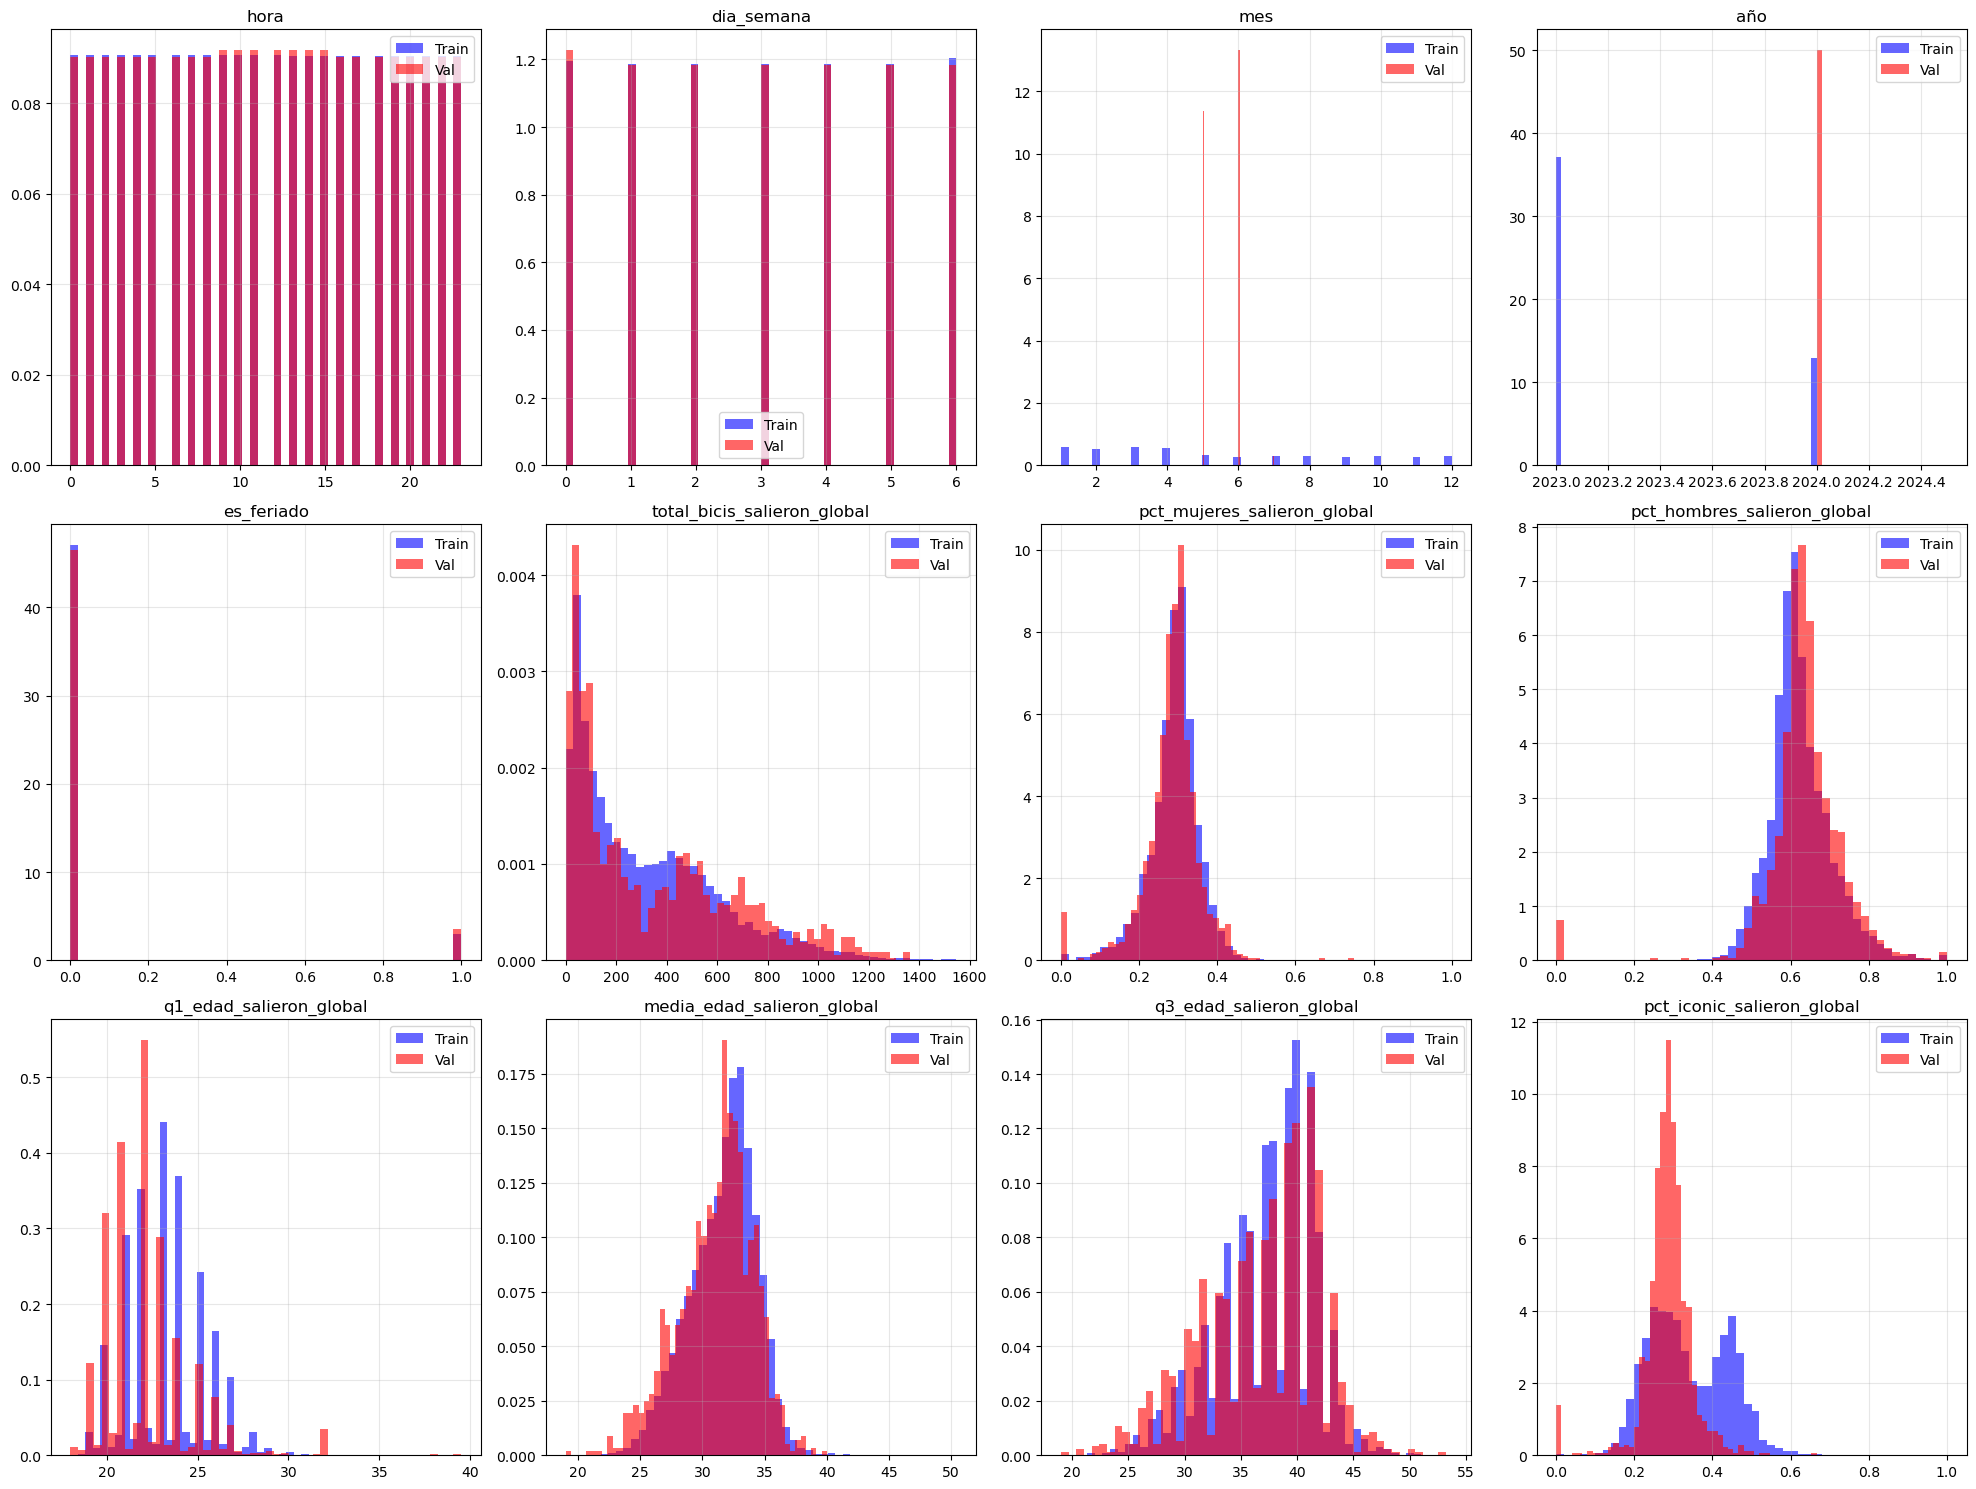

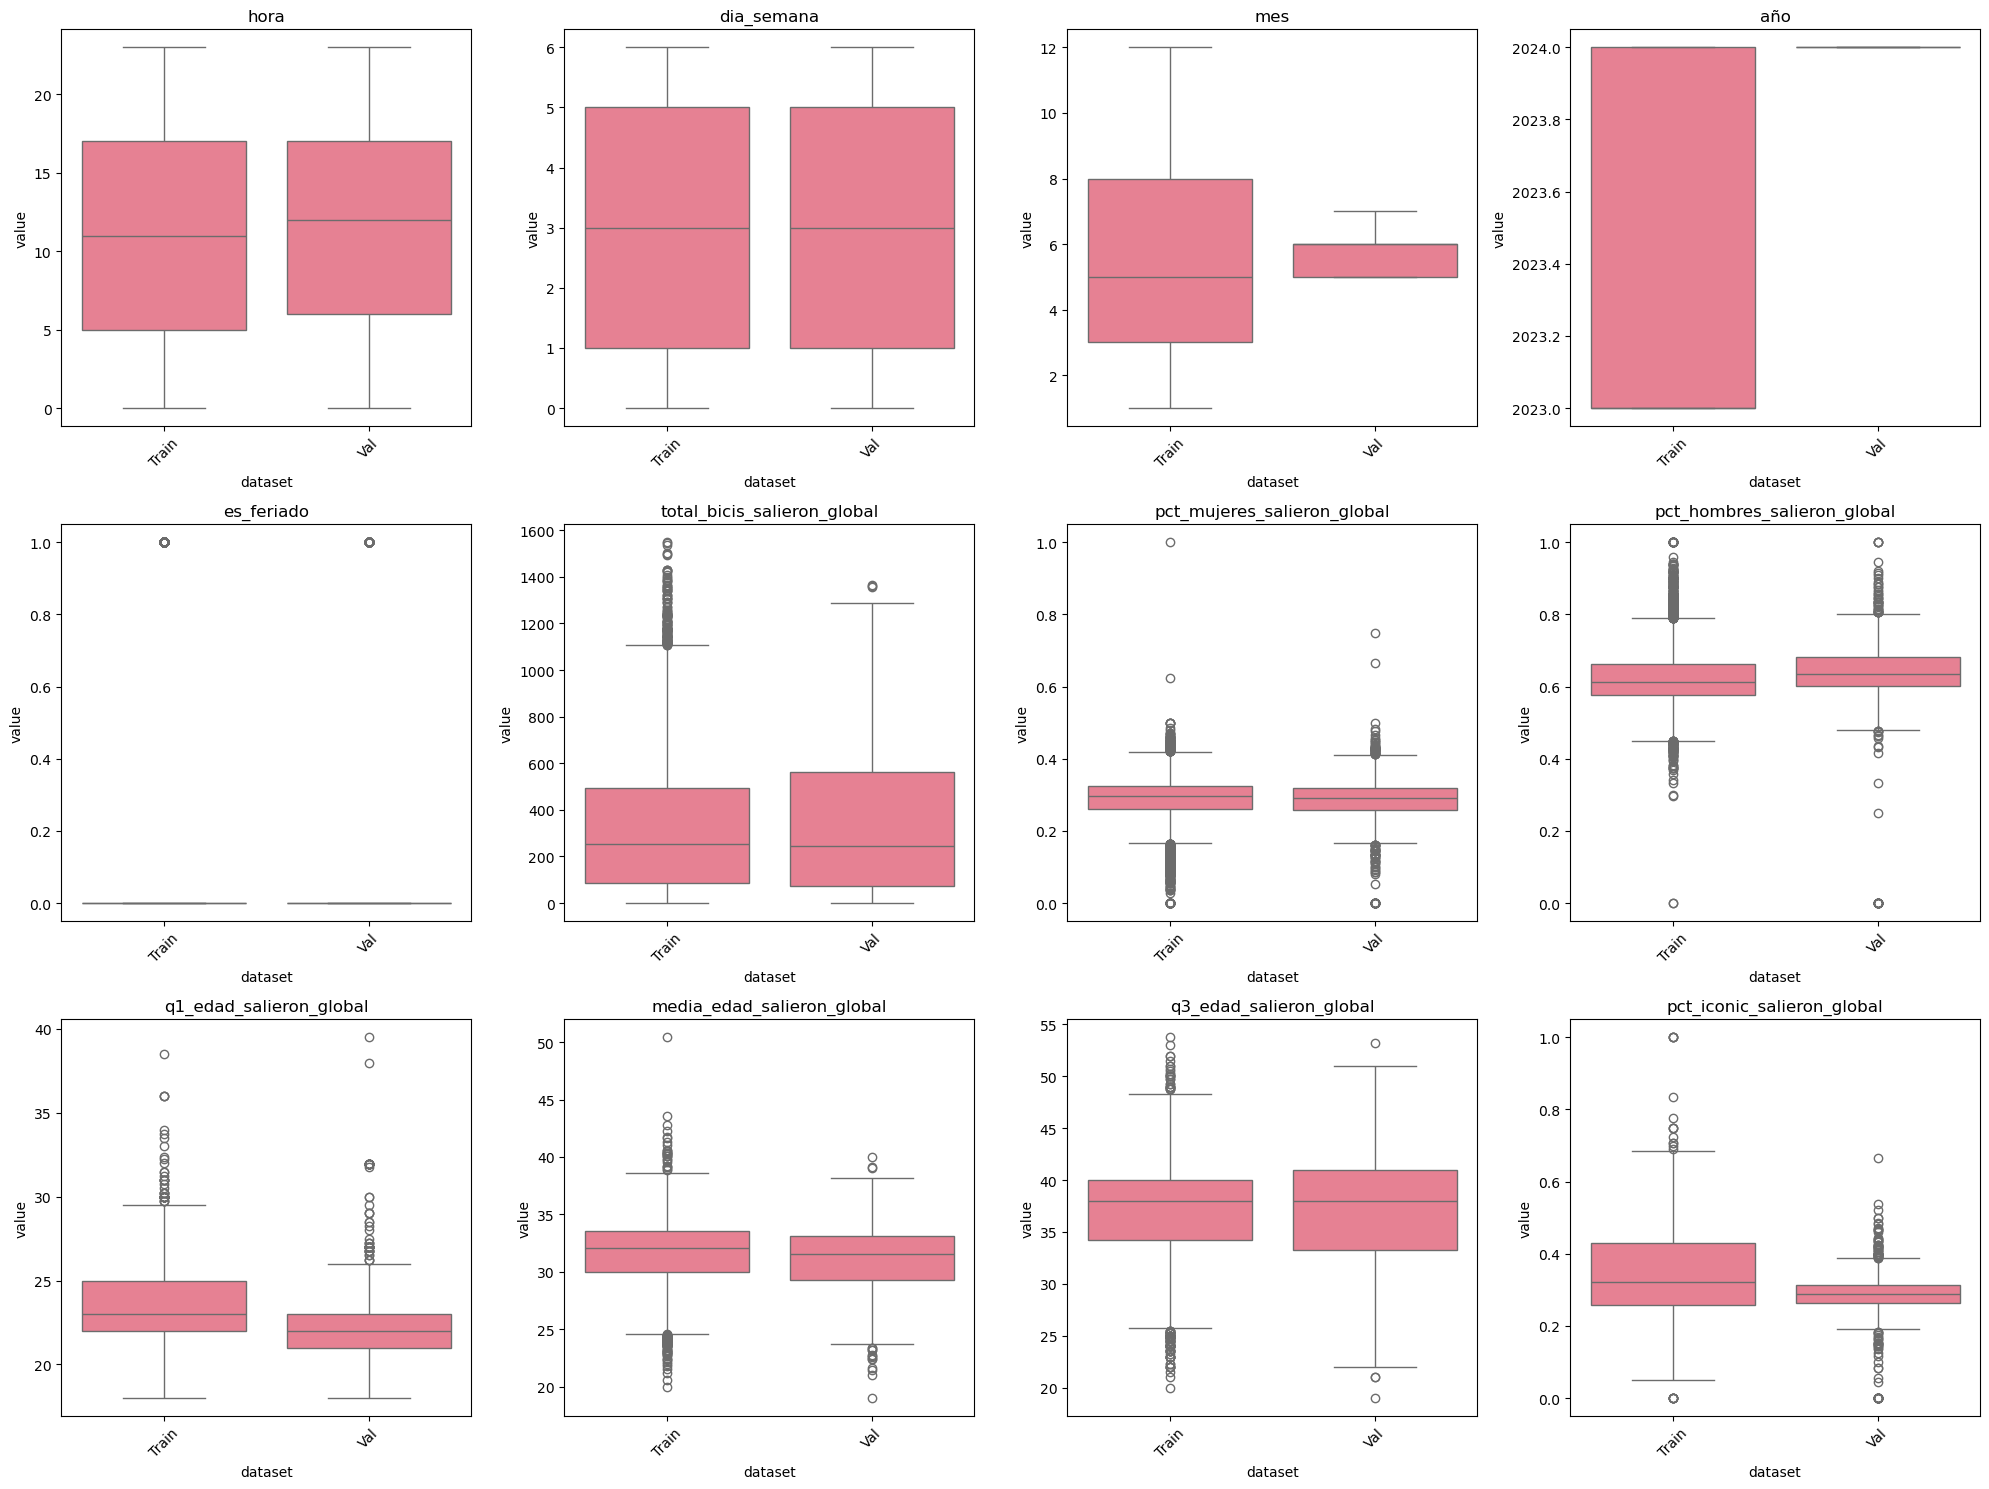

2. Ejecutando tests estad√≠sticos...


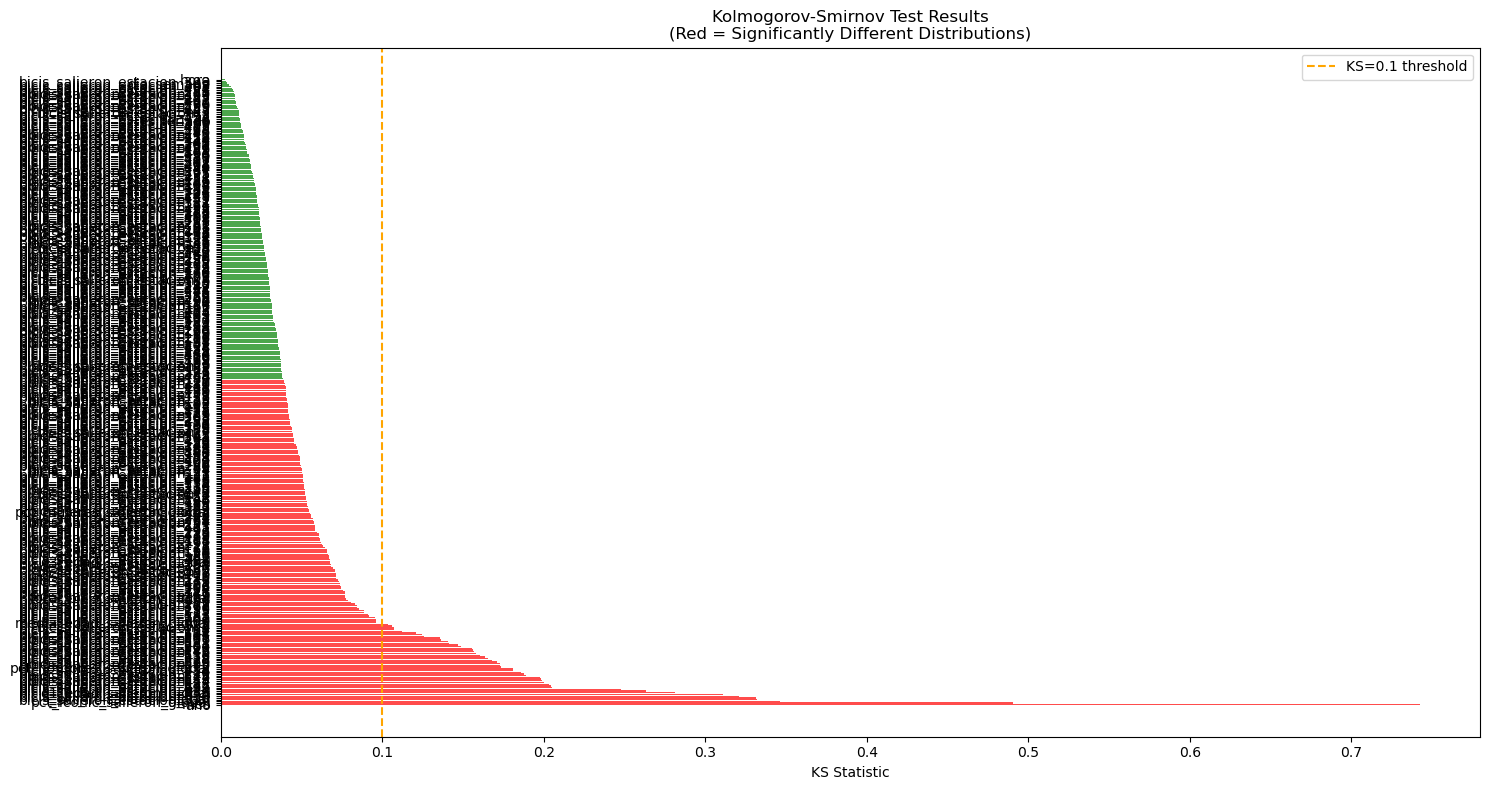

Features con distribuciones m√°s diferentes:
                         feature  ks_statistic        p_value  \
3                            a√±o      0.742562   0.000000e+00   
2                            mes      0.490294  3.331983e-269   
11    pct_iconic_salieron_global      0.346315  2.309768e-130   
345  bicis_salieron_estacion_516      0.331852  1.877852e-119   
12       pct_fit_salieron_global      0.331596  2.900509e-119   
358  bicis_salieron_estacion_530      0.320642  2.370463e-111   
362  bicis_salieron_estacion_534      0.311055  1.146122e-104   
8        q1_edad_salieron_global      0.281412   2.150301e-85   
364  bicis_salieron_estacion_536      0.263177   1.435201e-74   
352  bicis_salieron_estacion_524      0.248029   3.650117e-66   

     different_distributions  
3                       True  
2                       True  
11                      True  
345                     True  
12                      True  
358                     True  
362                  

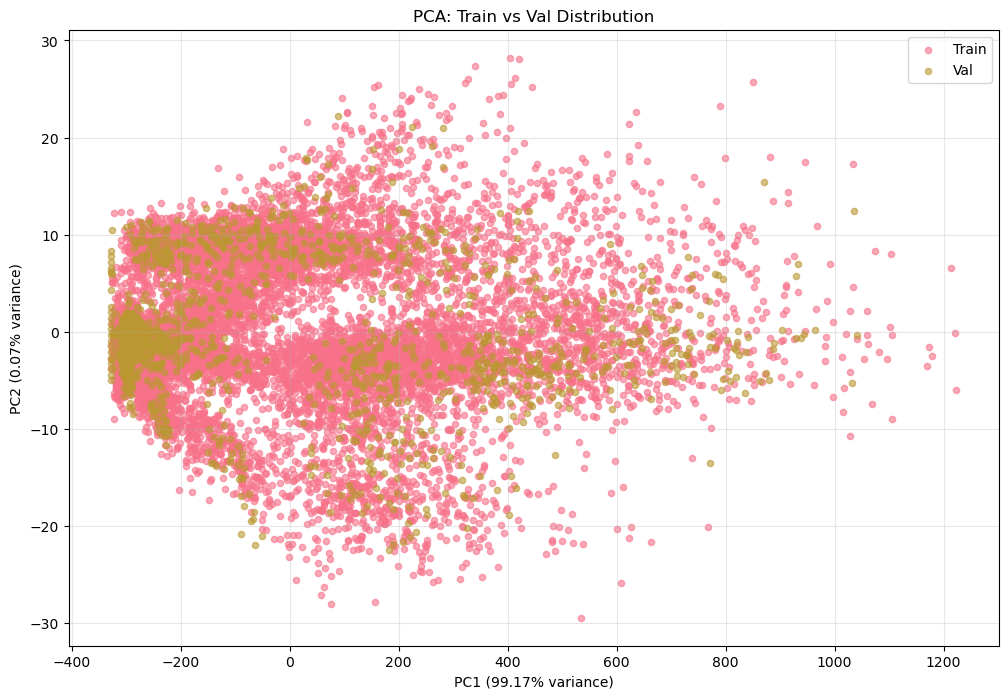

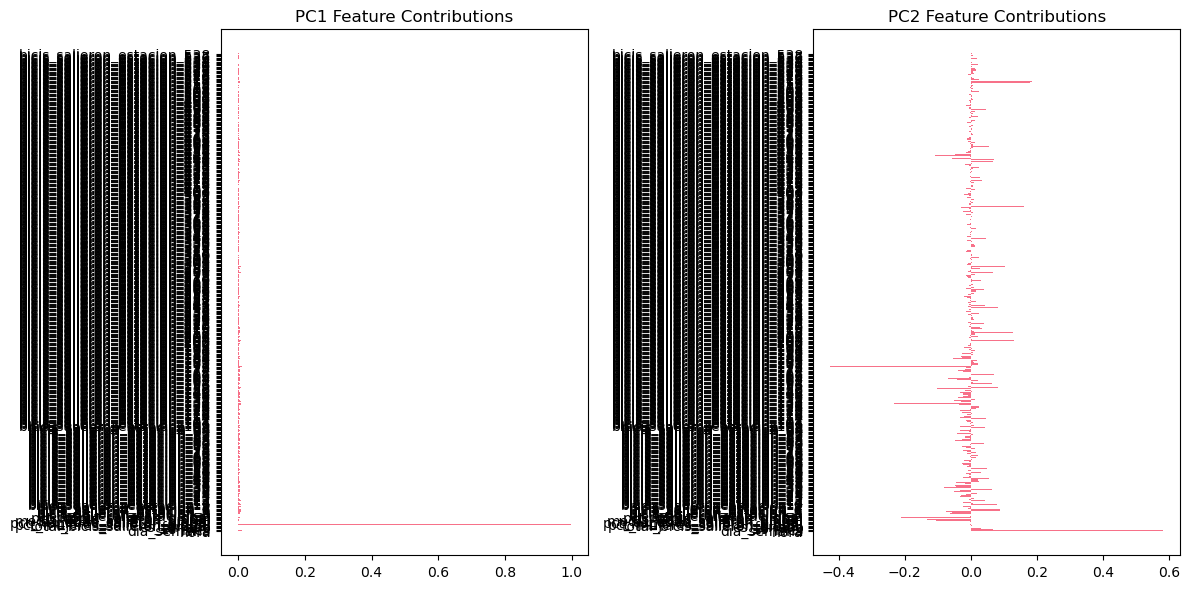

In [7]:



# Identifica las features num√©ricas
numeric_features = df_train.select_dtypes(include=[np.number]).columns.tolist()
# Excluye columnas que no sean features (como target, ids, etc.)
# numeric_features = [col for col in numeric_features if col not in ['target', 'id', etc.]]

print("Iniciando an√°lisis completo de diferencias Train vs Val...")

# 1. Distribuciones
print("1. Analizando distribuciones...")
plot_distributions_comparison(df_train, df_val, numeric_features[:12])
plot_box_comparison(df_train, df_val, numeric_features[:12])

# 2. Tests estad√≠sticos
print("2. Ejecutando tests estad√≠sticos...")
ks_results = ks_test_all_features(df_train, df_val, numeric_features)
print("Features con distribuciones m√°s diferentes:")
print(ks_results.head(10))

# 3. An√°lisis multivariado
print("3. An√°lisis PCA...")
pca_model, feature_contributions = pca_analysis(df_train, df_val, numeric_features)


4. An√°lisis t-SNE...


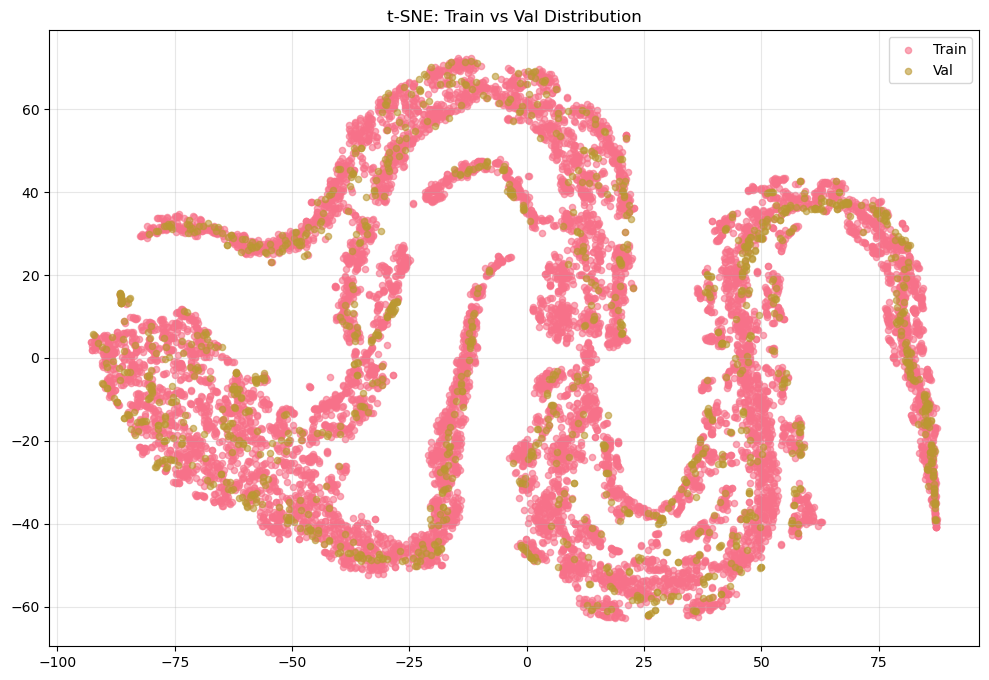

In [8]:
#T-sne

print("4. An√°lisis t-SNE...")
tsne_analysis(df_train, df_val, numeric_features)




5. Analizando correlaciones...


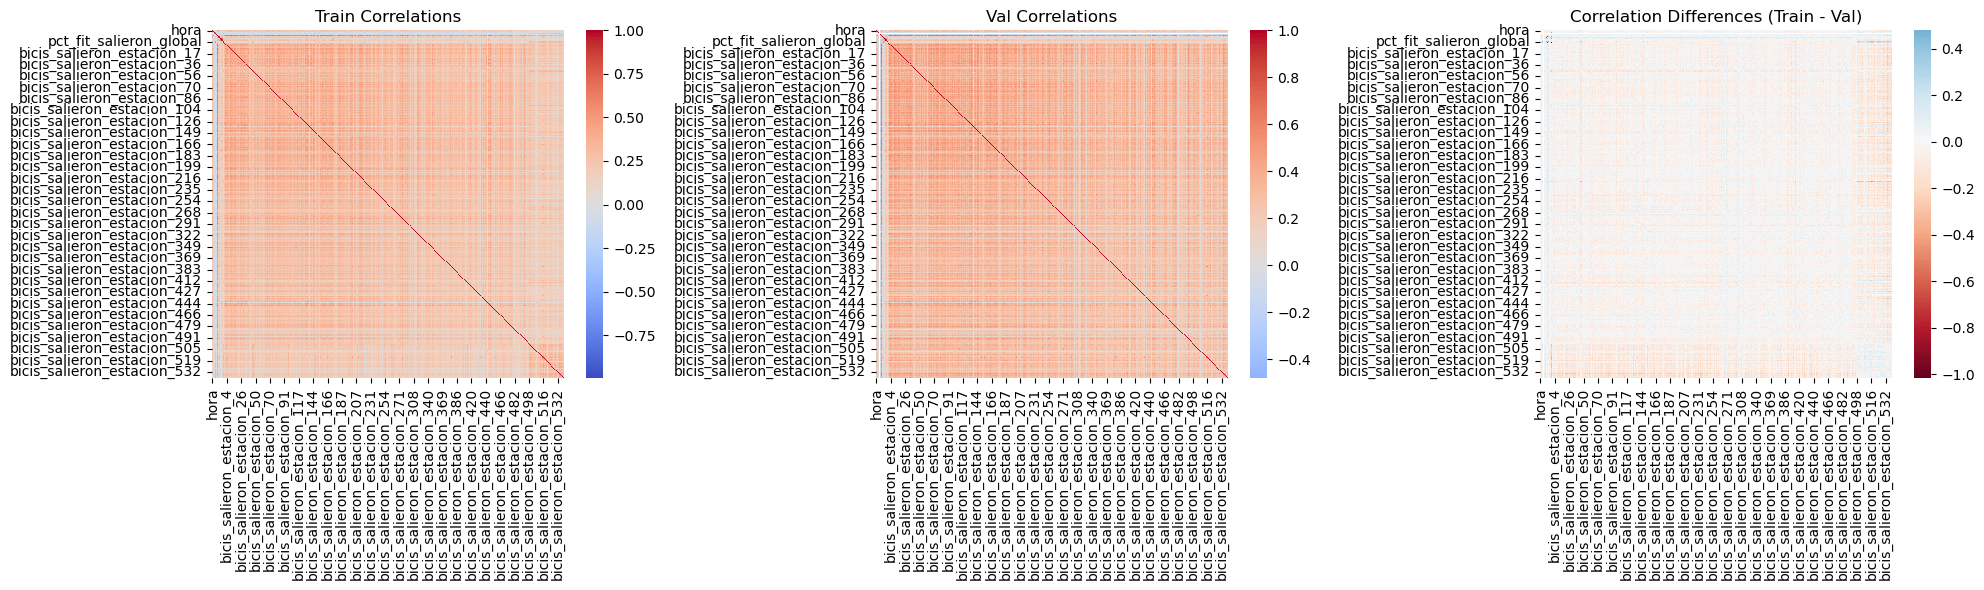

6. An√°lisis de drift temporal...


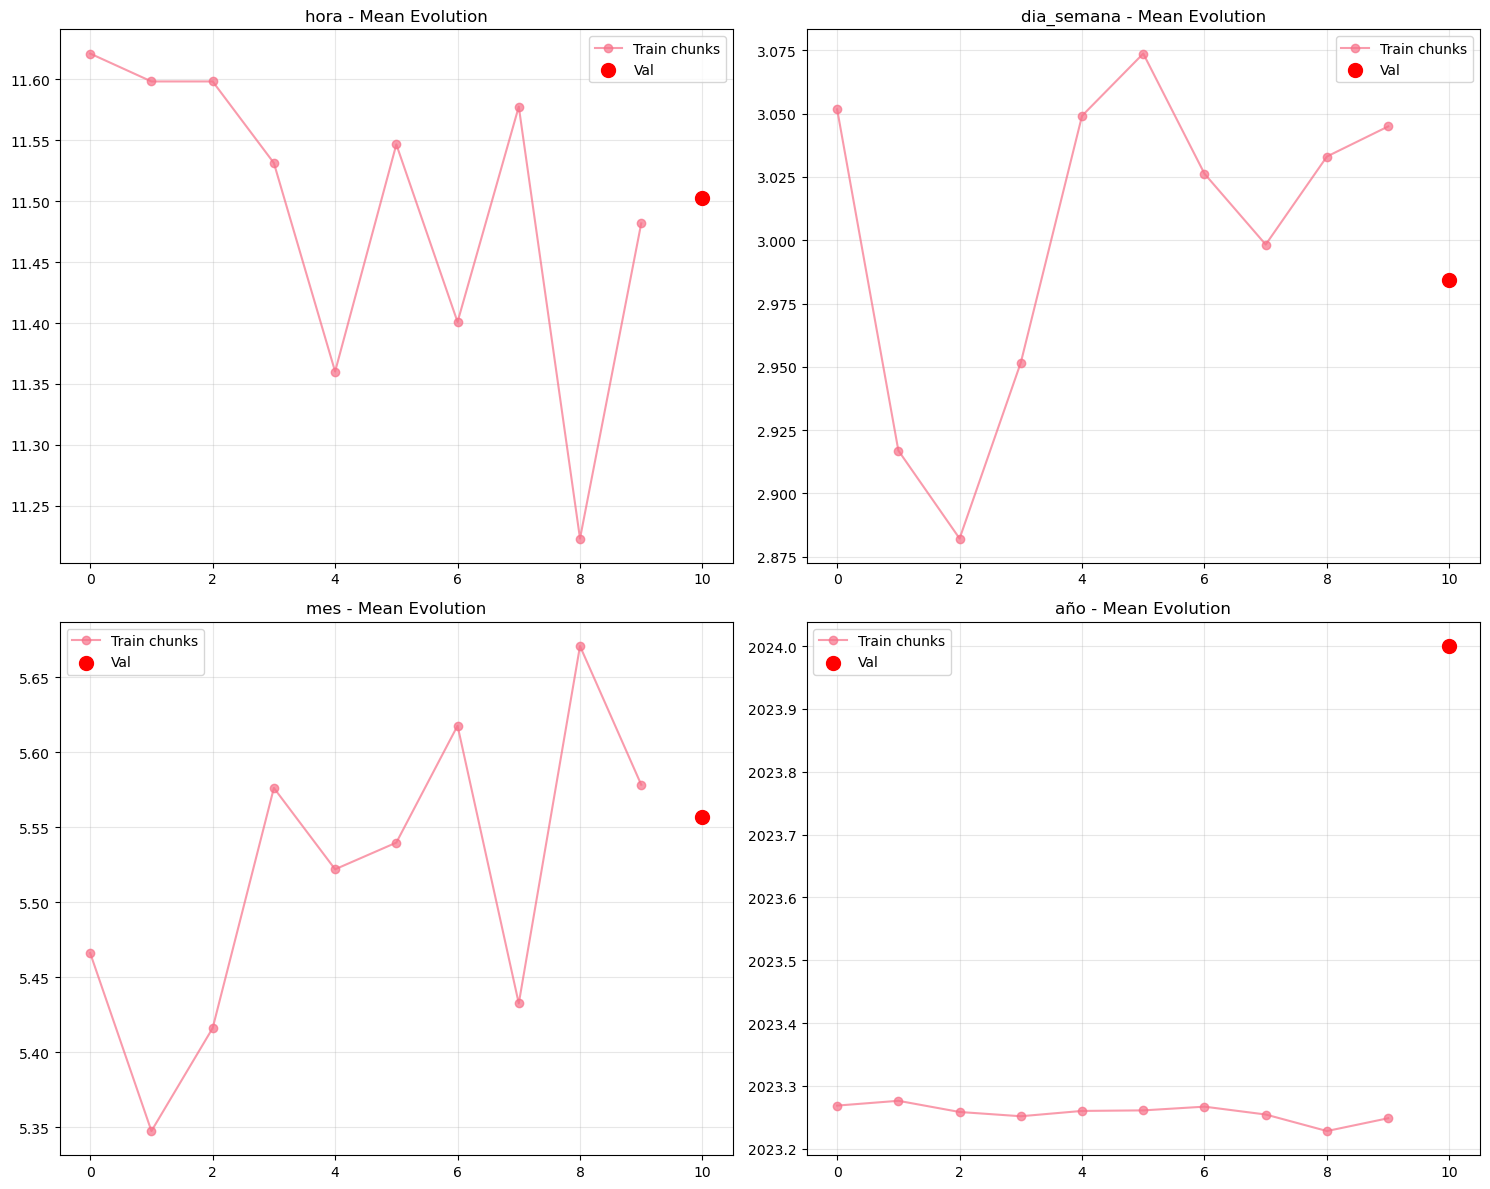

7. Analizando outliers...


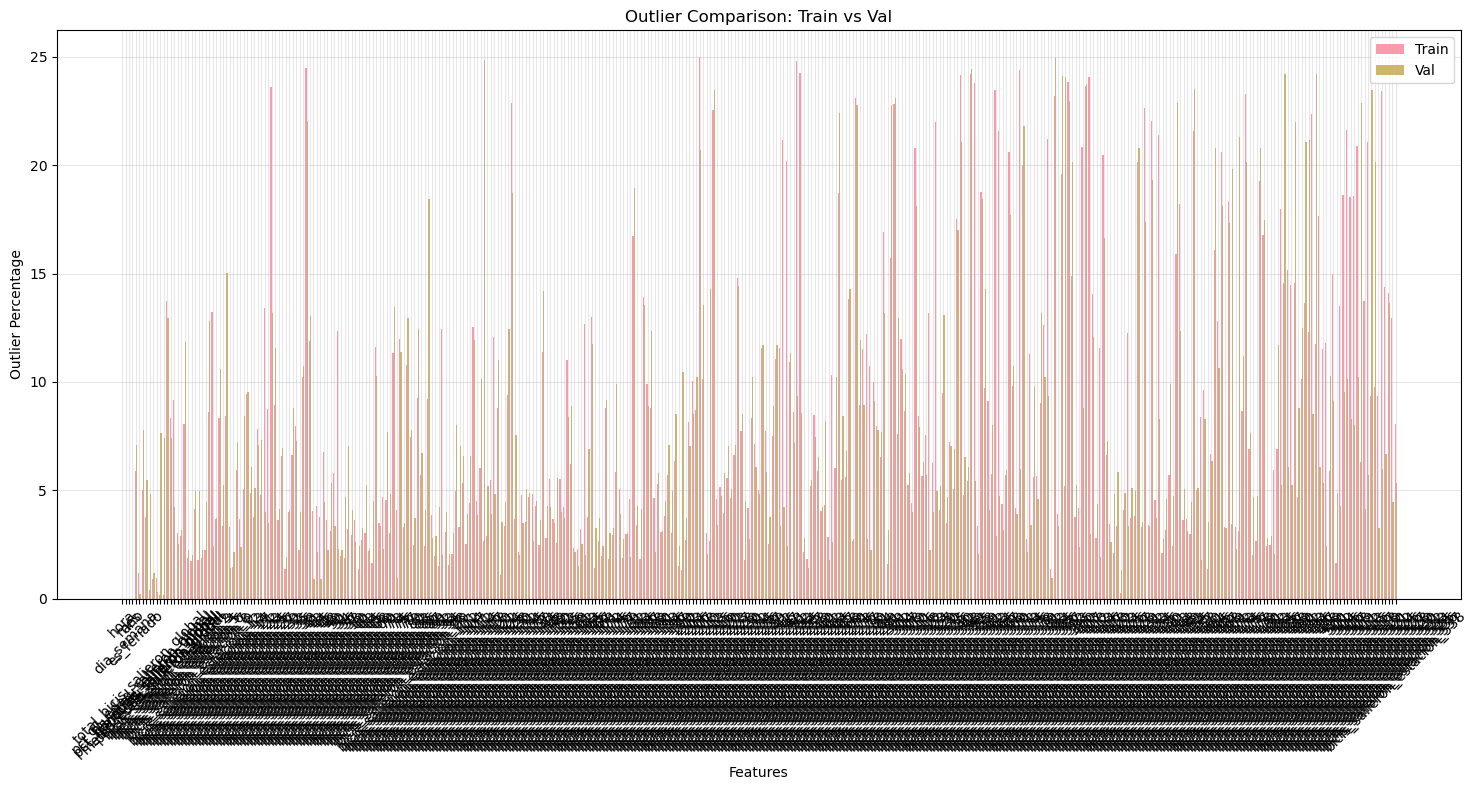

8. Resumen estad√≠stico completo...


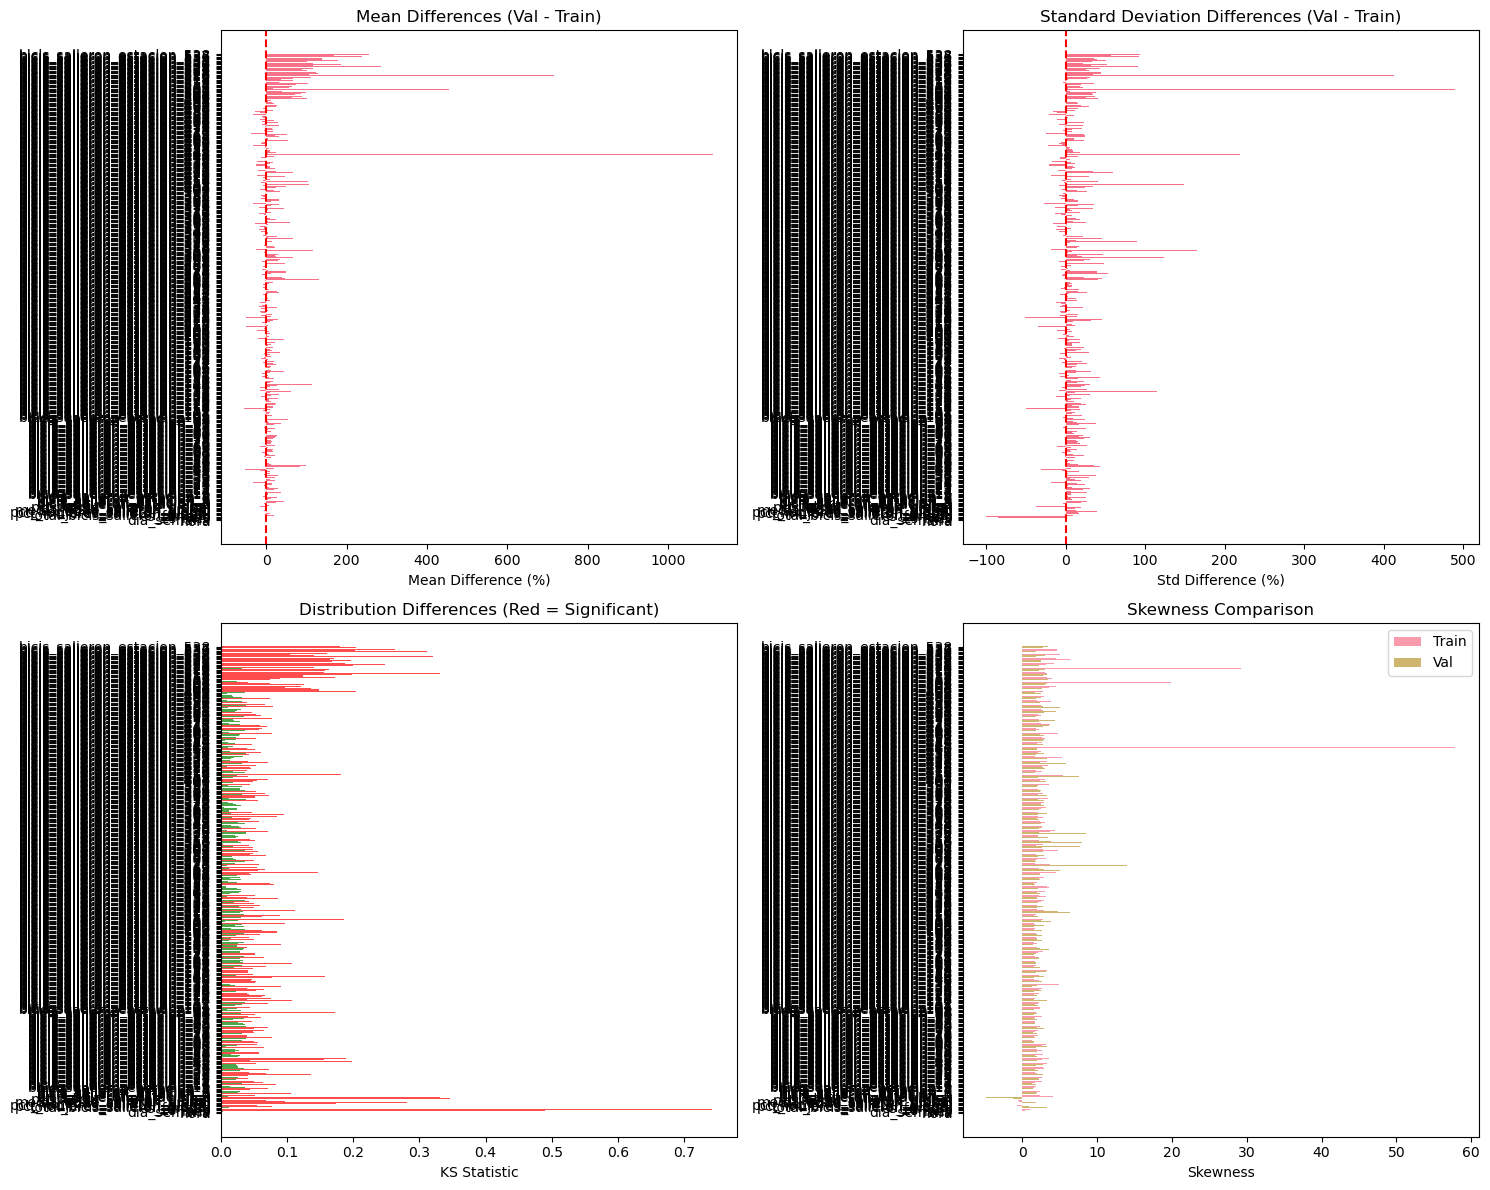


RESUMEN DE FEATURES M√ÅS PROBLEM√ÅTICAS:
                         feature  ks_statistic  mean_diff_pct  \
3                            a√±o      0.742562       0.036701   
2                            mes      0.490294       0.722948   
11    pct_iconic_salieron_global      0.346315     -15.959971   
345  bicis_salieron_estacion_516      0.331852      66.286626   
12       pct_fit_salieron_global      0.331596       5.981717   
358  bicis_salieron_estacion_530      0.320642     186.844581   
362  bicis_salieron_estacion_534      0.311055     139.124908   
8        q1_edad_salieron_global      0.281412      -4.391259   
364  bicis_salieron_estacion_536      0.263177     237.809246   
352  bicis_salieron_estacion_524      0.248029     123.430079   

     significant_diff  
3                True  
2                True  
11               True  
345              True  
12               True  
358              True  
362              True  
8                True  
364              True  
3

In [9]:

# 5. Correlaciones
print("5. Analizando correlaciones...")
train_corr, val_corr, corr_diff = correlation_comparison(df_train, df_val, numeric_features)

# 6. An√°lisis temporal
print("6. An√°lisis de drift temporal...")
drift_results = drift_analysis_by_chunks(df_train, df_val, numeric_features[:8])

# 7. Outliers
print("7. Analizando outliers...")
outlier_results = outlier_analysis(df_train, df_val, numeric_features)

# 8. Resumen estad√≠stico completo
print("8. Resumen estad√≠stico completo...")
complete_stats = complete_statistical_summary(df_train, df_val, numeric_features)

# 9. Crear reporte de features m√°s problem√°ticas
print("\n" + "="*50)
print("RESUMEN DE FEATURES M√ÅS PROBLEM√ÅTICAS:")
print("="*50)

# Combinar resultados para identificar las features m√°s problem√°ticas
problematic_features = complete_stats.nlargest(10, 'ks_statistic')[['feature', 'ks_statistic', 'mean_diff_pct', 'significant_diff']]
print(problematic_features)

print("\nFeatures con mayor diferencia en outliers:")
outlier_issues = outlier_results.nlargest(5, 'outlier_diff')[['feature', 'outlier_diff']]
print(outlier_issues)

Analizando dataset de entrenamiento:
üìä Analizando distribuci√≥n de targets en dataset formateado...
üéØ Encontradas 324 columnas target
üìà Estad√≠sticas de targets:
   ‚Ä¢ Total de observaciones: 3,822,228
   ‚Ä¢ N√∫mero de muestras: 11,797
   ‚Ä¢ N√∫mero de estaciones: 324
   ‚Ä¢ M√≠nimo: 0.0
   ‚Ä¢ M√°ximo: 39.0
   ‚Ä¢ Media: 0.96
   ‚Ä¢ Mediana: 0.00
   ‚Ä¢ Desviaci√≥n est√°ndar: 1.68


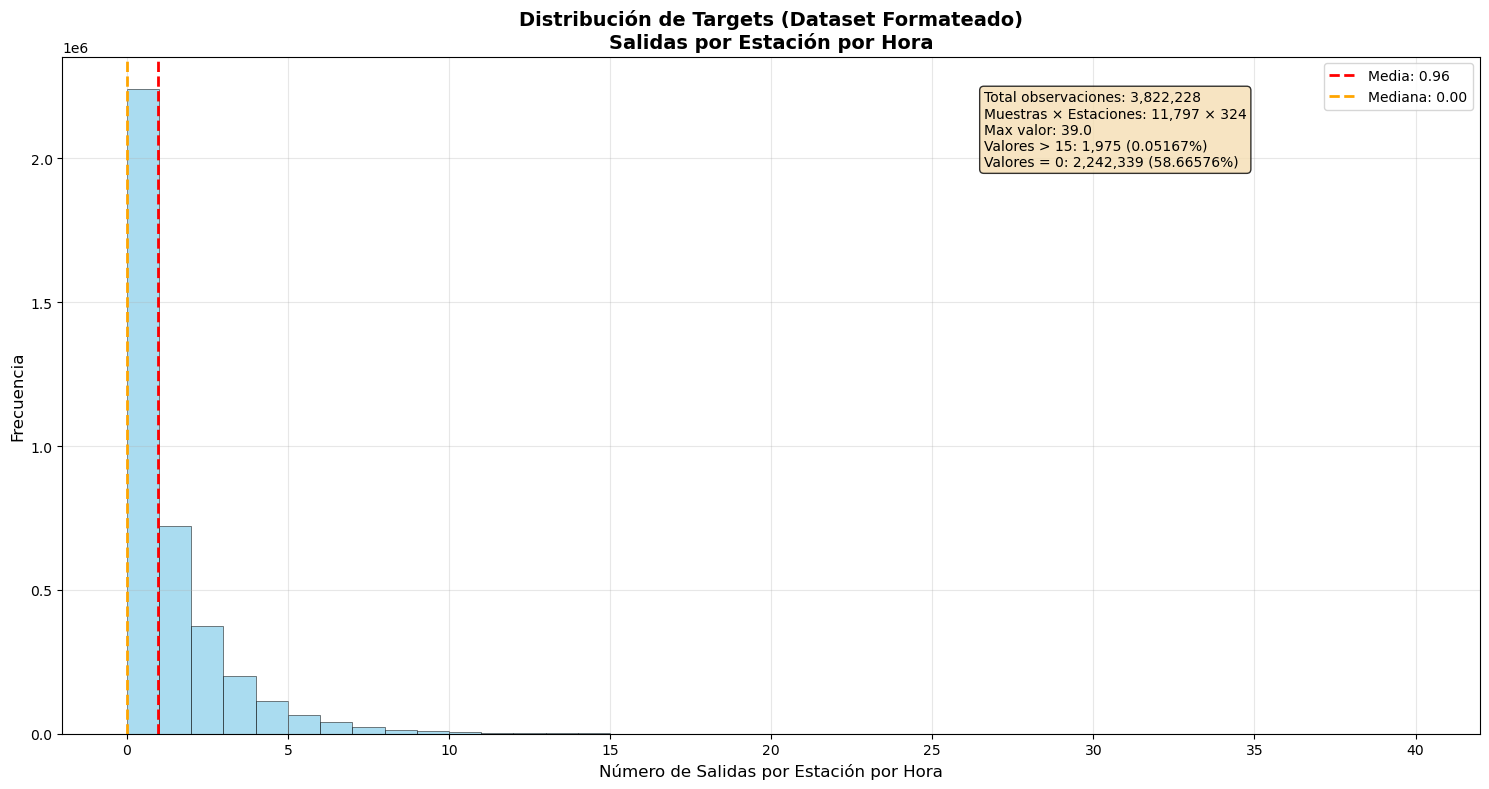


üìä Distribuci√≥n por rangos:
   ‚Ä¢ Valores = 0: 2,242,339 (58.66576%)
   ‚Ä¢ Valores 1-5: 1,478,252 (38.67514%)
   ‚Ä¢ Valores 6-10: 90,547 (2.36896%)
   ‚Ä¢ Valores 11-15: 9,115 (0.23847%)
   ‚Ä¢ Valores 16-20: 1,524 (0.03987%)
   ‚Ä¢ Valores > 20: 451 (0.01180%)

üîù Top 10 valores m√°s frecuentes:
   ‚Ä¢ 0.0 salidas: 2,242,339 veces (58.67%)
   ‚Ä¢ 1.0 salidas: 722,286 veces (18.90%)
   ‚Ä¢ 2.0 salidas: 373,136 veces (9.76%)
   ‚Ä¢ 3.0 salidas: 201,666 veces (5.28%)
   ‚Ä¢ 4.0 salidas: 114,901 veces (3.01%)
   ‚Ä¢ 5.0 salidas: 66,263 veces (1.73%)
   ‚Ä¢ 6.0 salidas: 39,154 veces (1.02%)
   ‚Ä¢ 7.0 salidas: 23,088 veces (0.60%)
   ‚Ä¢ 8.0 salidas: 14,066 veces (0.37%)
   ‚Ä¢ 9.0 salidas: 8,734 veces (0.23%)

üè™ Estad√≠sticas por estaci√≥n:
Top 5 estaciones con mayor actividad promedio:
   1. Estaci√≥n 14: 3.74 ¬± 3.72 (max: 27.0, 19.6% ceros)
   2. Estaci√≥n 175: 3.68 ¬± 5.20 (max: 35.0, 30.4% ceros)
   3. Estaci√≥n 8: 3.22 ¬± 3.21 (max: 23.0, 23.7% ceros)
   4. Estaci√≥n 5: 

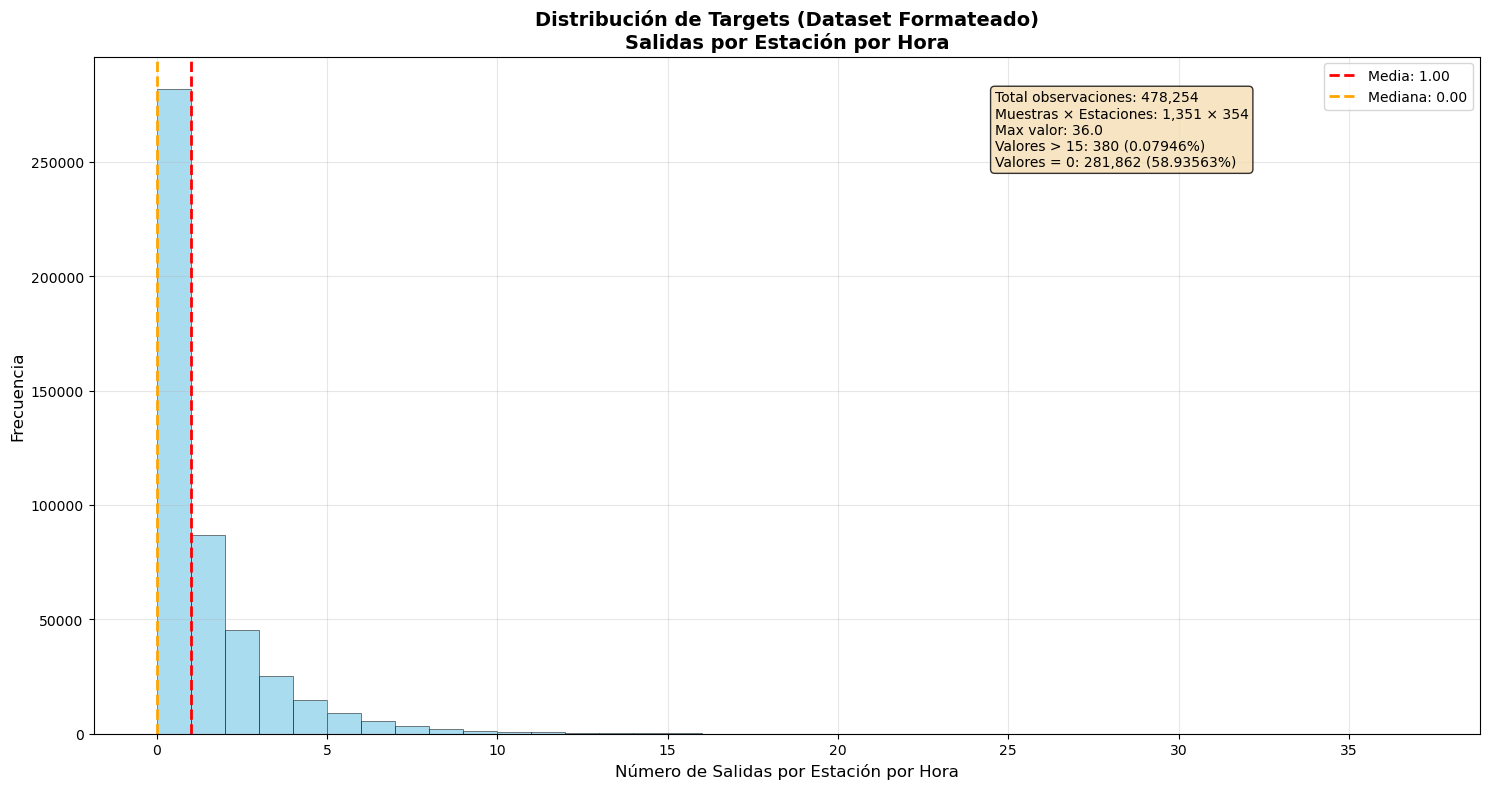


üìä Distribuci√≥n por rangos:
   ‚Ä¢ Valores = 0: 281,862 (58.93563%)
   ‚Ä¢ Valores 1-5: 181,352 (37.91960%)
   ‚Ä¢ Valores 6-10: 13,143 (2.74812%)
   ‚Ä¢ Valores 11-15: 1,517 (0.31720%)
   ‚Ä¢ Valores 16-20: 262 (0.05478%)
   ‚Ä¢ Valores > 20: 118 (0.02467%)

üîù Top 10 valores m√°s frecuentes:
   ‚Ä¢ 0.0 salidas: 281,862 veces (58.94%)
   ‚Ä¢ 1.0 salidas: 86,993 veces (18.19%)
   ‚Ä¢ 2.0 salidas: 45,374 veces (9.49%)
   ‚Ä¢ 3.0 salidas: 25,226 veces (5.27%)
   ‚Ä¢ 4.0 salidas: 14,822 veces (3.10%)
   ‚Ä¢ 5.0 salidas: 8,937 veces (1.87%)
   ‚Ä¢ 6.0 salidas: 5,394 veces (1.13%)
   ‚Ä¢ 7.0 salidas: 3,413 veces (0.71%)
   ‚Ä¢ 8.0 salidas: 2,145 veces (0.45%)
   ‚Ä¢ 9.0 salidas: 1,313 veces (0.27%)

üè™ Estad√≠sticas por estaci√≥n:
Top 5 estaciones con mayor actividad promedio:
   1. Estaci√≥n 175: 4.64 ¬± 6.58 (max: 36.0, 28.5% ceros)
   2. Estaci√≥n 14: 3.74 ¬± 3.81 (max: 23.0, 21.6% ceros)
   3. Estaci√≥n 131: 3.26 ¬± 3.86 (max: 21.0, 31.4% ceros)
   4. Estaci√≥n 5: 3.14 ¬± 3.77 (

In [10]:
#Quiero ver la distribuci√≥n de todos los targets en forma de histograma (cada bin es un numero entero del 0 al 50)
def analizar_distribucion_targets_formateado(df_formateado):
    """
    Analiza y grafica la distribuci√≥n de targets en un dataset ya formateado
    como train_dataset_features_3.csv que tiene columnas target_estacion_X
    """
    print("üìä Analizando distribuci√≥n de targets en dataset formateado...")
    
    # Identificar todas las columnas target
    target_columns = [col for col in df_formateado.columns if col.startswith('target_estacion_')]
    print(f"üéØ Encontradas {len(target_columns)} columnas target")
    
    if len(target_columns) == 0:
        print("‚ùå No se encontraron columnas target en el dataset")
        return None, None
    
    # Extraer todos los valores target de todas las estaciones y todas las muestras
    all_targets = df_formateado[target_columns].values.flatten()
    
    # Remover valores NaN si los hay
    all_targets = all_targets[~np.isnan(all_targets)]
    
    print(f"üìà Estad√≠sticas de targets:")
    print(f"   ‚Ä¢ Total de observaciones: {len(all_targets):,}")
    print(f"   ‚Ä¢ N√∫mero de muestras: {len(df_formateado):,}")
    print(f"   ‚Ä¢ N√∫mero de estaciones: {len(target_columns)}")
    print(f"   ‚Ä¢ M√≠nimo: {all_targets.min()}")
    print(f"   ‚Ä¢ M√°ximo: {all_targets.max()}")
    print(f"   ‚Ä¢ Media: {all_targets.mean():.2f}")
    print(f"   ‚Ä¢ Mediana: {np.median(all_targets):.2f}")
    print(f"   ‚Ä¢ Desviaci√≥n est√°ndar: {all_targets.std():.2f}")
    
    # Crear bins para valores enteros de 0 hasta el m√°ximo (o 50 si es menor)
    max_val = min(int(all_targets.max()) + 1, 51)
    bins = np.arange(0, max_val + 1, 1)
    
    # Crear el histograma
    plt.figure(figsize=(15, 8))
    
    # Histograma principal
    counts, bin_edges, patches = plt.hist(all_targets, bins=bins, alpha=0.7, color='skyblue', 
                                         edgecolor='black', linewidth=0.5)
    
    # Agregar l√≠neas de estad√≠sticas importantes
    plt.axvline(all_targets.mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Media: {all_targets.mean():.2f}')
    plt.axvline(np.median(all_targets), color='orange', linestyle='--', linewidth=2, 
                label=f'Mediana: {np.median(all_targets):.2f}')
    
    # Configurar el gr√°fico
    plt.xlabel('N√∫mero de Salidas por Estaci√≥n por Hora', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.title('Distribuci√≥n de Targets (Dataset Formateado)\nSalidas por Estaci√≥n por Hora', 
              fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Configurar xticks para mostrar solo algunos valores para mejor legibilidad
    if max_val <= 25:
        plt.xticks(range(0, max_val + 1, 2))
    else:
        plt.xticks(range(0, max_val + 1, 5))
    
    # Agregar texto con estad√≠sticas
    textstr = f'Total observaciones: {len(all_targets):,}\n'
    textstr += f'Muestras √ó Estaciones: {len(df_formateado):,} √ó {len(target_columns)}\n'
    textstr += f'Max valor: {all_targets.max()}\n'
    textstr += f'Valores > 15: {np.sum(all_targets > 15):,} ({(np.sum(all_targets > 15)/len(all_targets)*100):.5f}%)\n'
    textstr += f'Valores = 0: {np.sum(all_targets == 0):,} ({(np.sum(all_targets == 0)/len(all_targets)*100):.5f}%)'
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    plt.text(0.65, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.show()
    
    # An√°lisis detallado por rangos
    print(f"\nüìä Distribuci√≥n por rangos:")
    print(f"   ‚Ä¢ Valores = 0: {np.sum(all_targets == 0):,} ({(np.sum(all_targets == 0)/len(all_targets)*100):.5f}%)")
    print(f"   ‚Ä¢ Valores 1-5: {np.sum((all_targets >= 1) & (all_targets <= 5)):,} ({(np.sum((all_targets >= 1) & (all_targets <= 5))/len(all_targets)*100):.5f}%)")
    print(f"   ‚Ä¢ Valores 6-10: {np.sum((all_targets >= 6) & (all_targets <= 10)):,} ({(np.sum((all_targets >= 6) & (all_targets <= 10))/len(all_targets)*100):.5f}%)")
    print(f"   ‚Ä¢ Valores 11-15: {np.sum((all_targets >= 11) & (all_targets <= 15)):,} ({(np.sum((all_targets >= 11) & (all_targets <= 15))/len(all_targets)*100):.5f}%)")
    print(f"   ‚Ä¢ Valores 16-20: {np.sum((all_targets >= 16) & (all_targets <= 20)):,} ({(np.sum((all_targets >= 16) & (all_targets <= 20))/len(all_targets)*100):.5f}%)")
    print(f"   ‚Ä¢ Valores > 20: {np.sum(all_targets > 20):,} ({(np.sum(all_targets > 20)/len(all_targets)*100):.5f}%)")
    
    # Top valores m√°s frecuentes
    from collections import Counter
    target_counts = Counter(all_targets)
    print(f"\nüîù Top 10 valores m√°s frecuentes:")
    for valor, freq in target_counts.most_common(10):
        print(f"   ‚Ä¢ {valor} salidas: {freq:,} veces ({(freq/len(all_targets)*100):.2f}%)")
    
    # An√°lisis por estaci√≥n
    print(f"\nüè™ Estad√≠sticas por estaci√≥n:")
    estacion_stats = []
    for col in target_columns:
        estacion_id = col.replace('target_estacion_', '')
        estacion_values = df_formateado[col].values
        estacion_stats.append({
            'estacion_id': estacion_id,
            'mean': estacion_values.mean(),
            'std': estacion_values.std(),
            'max': estacion_values.max(),
            'zeros_pct': (estacion_values == 0).mean() * 100
        })
    
    # Ordenar por media descendente
    estacion_stats.sort(key=lambda x: x['mean'], reverse=True)
    
    print("Top 5 estaciones con mayor actividad promedio:")
    for i, stats in enumerate(estacion_stats[:5]):
        print(f"   {i+1}. Estaci√≥n {stats['estacion_id']}: {stats['mean']:.2f} ¬± {stats['std']:.2f} (max: {stats['max']}, {stats['zeros_pct']:.1f}% ceros)")
    
    print("\nTop 5 estaciones con menor actividad promedio:")
    for i, stats in enumerate(estacion_stats[-5:]):
        idx = len(estacion_stats) - 5 + i + 1
        print(f"   {idx}. Estaci√≥n {stats['estacion_id']}: {stats['mean']:.2f} ¬± {stats['std']:.2f} (max: {stats['max']}, {stats['zeros_pct']:.1f}% ceros)")
    
    return all_targets, target_columns


df_train = os.path.join(project_root, 'data', 'processed', 'features3', 'train_dataset_features_3.csv')
df_train = pd.read_csv(df_train)

#Saco las ultimas 38 columnas
df_train = df_train.iloc[:, :-38]

df_val = os.path.join(project_root, 'data', 'processed', 'features3', 'val_dataset_features_3.csv')
df_val = pd.read_csv(df_val)
# Ejecutar an√°lisis con el dataset formateado
print("Analizando dataset de entrenamiento:")
targets_distribution_train, target_cols_train = analizar_distribucion_targets_formateado(df_train)

print("\n" + "="*80)
print("Analizando dataset de validaci√≥n:")
targets_distribution_val, target_cols_val = analizar_distribucion_targets_formateado(df_val)